# MFCC

In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import json
import os
import math

In [ ]:
DATASET_PATH = "genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: genres_original\blues
genres_original\blues\blues.00000.wav, segment:1
genres_original\blues\blues.00000.wav, segment:2
genres_original\blues\blues.00000.wav, segment:3
genres_original\blues\blues.00000.wav, segment:4
genres_original\blues\blues.00000.wav, segment:5
genres_original\blues\blues.00000.wav, segment:6
genres_original\blues\blues.00000.wav, segment:7
genres_original\blues\blues.00000.wav, segment:8
genres_original\blues\blues.00000.wav, segment:9
genres_original\blues\blues.00000.wav, segment:10
genres_original\blues\blues.00001.wav, segment:1
genres_original\blues\blues.00001.wav, segment:2
genres_original\blues\blues.00001.wav, segment:3
genres_original\blues\blues.00001.wav, segment:4
genres_original\blues\blues.00001.wav, segment:5
genres_original\blues\blues.00001.wav, segment:6
genres_original\blues\blues.00001.wav, segment:7
genres_original\blues\blues.00001.wav, segment:8
genres_original\blues\blues.00001.wav, segment:9
genres_original\blues\blues.00001

genres_original\blues\blues.00017.wav, segment:1
genres_original\blues\blues.00017.wav, segment:2
genres_original\blues\blues.00017.wav, segment:3
genres_original\blues\blues.00017.wav, segment:4
genres_original\blues\blues.00017.wav, segment:5
genres_original\blues\blues.00017.wav, segment:6
genres_original\blues\blues.00017.wav, segment:7
genres_original\blues\blues.00017.wav, segment:8
genres_original\blues\blues.00017.wav, segment:9
genres_original\blues\blues.00017.wav, segment:10
genres_original\blues\blues.00018.wav, segment:1
genres_original\blues\blues.00018.wav, segment:2
genres_original\blues\blues.00018.wav, segment:3
genres_original\blues\blues.00018.wav, segment:4
genres_original\blues\blues.00018.wav, segment:5
genres_original\blues\blues.00018.wav, segment:6
genres_original\blues\blues.00018.wav, segment:7
genres_original\blues\blues.00018.wav, segment:8
genres_original\blues\blues.00018.wav, segment:9
genres_original\blues\blues.00018.wav, segment:10
genres_original\bl

genres_original\blues\blues.00034.wav, segment:1
genres_original\blues\blues.00034.wav, segment:2
genres_original\blues\blues.00034.wav, segment:3
genres_original\blues\blues.00034.wav, segment:4
genres_original\blues\blues.00034.wav, segment:5
genres_original\blues\blues.00034.wav, segment:6
genres_original\blues\blues.00034.wav, segment:7
genres_original\blues\blues.00034.wav, segment:8
genres_original\blues\blues.00034.wav, segment:9
genres_original\blues\blues.00034.wav, segment:10
genres_original\blues\blues.00035.wav, segment:1
genres_original\blues\blues.00035.wav, segment:2
genres_original\blues\blues.00035.wav, segment:3
genres_original\blues\blues.00035.wav, segment:4
genres_original\blues\blues.00035.wav, segment:5
genres_original\blues\blues.00035.wav, segment:6
genres_original\blues\blues.00035.wav, segment:7
genres_original\blues\blues.00035.wav, segment:8
genres_original\blues\blues.00035.wav, segment:9
genres_original\blues\blues.00035.wav, segment:10
genres_original\bl

genres_original\blues\blues.00051.wav, segment:4
genres_original\blues\blues.00051.wav, segment:5
genres_original\blues\blues.00051.wav, segment:6
genres_original\blues\blues.00051.wav, segment:7
genres_original\blues\blues.00051.wav, segment:8
genres_original\blues\blues.00051.wav, segment:9
genres_original\blues\blues.00051.wav, segment:10
genres_original\blues\blues.00052.wav, segment:1
genres_original\blues\blues.00052.wav, segment:2
genres_original\blues\blues.00052.wav, segment:3
genres_original\blues\blues.00052.wav, segment:4
genres_original\blues\blues.00052.wav, segment:5
genres_original\blues\blues.00052.wav, segment:6
genres_original\blues\blues.00052.wav, segment:7
genres_original\blues\blues.00052.wav, segment:8
genres_original\blues\blues.00052.wav, segment:9
genres_original\blues\blues.00052.wav, segment:10
genres_original\blues\blues.00053.wav, segment:1
genres_original\blues\blues.00053.wav, segment:2
genres_original\blues\blues.00053.wav, segment:3
genres_original\bl

genres_original\blues\blues.00068.wav, segment:2
genres_original\blues\blues.00068.wav, segment:3
genres_original\blues\blues.00068.wav, segment:4
genres_original\blues\blues.00068.wav, segment:5
genres_original\blues\blues.00068.wav, segment:6
genres_original\blues\blues.00068.wav, segment:7
genres_original\blues\blues.00068.wav, segment:8
genres_original\blues\blues.00068.wav, segment:9
genres_original\blues\blues.00068.wav, segment:10
genres_original\blues\blues.00069.wav, segment:1
genres_original\blues\blues.00069.wav, segment:2
genres_original\blues\blues.00069.wav, segment:3
genres_original\blues\blues.00069.wav, segment:4
genres_original\blues\blues.00069.wav, segment:5
genres_original\blues\blues.00069.wav, segment:6
genres_original\blues\blues.00069.wav, segment:7
genres_original\blues\blues.00069.wav, segment:8
genres_original\blues\blues.00069.wav, segment:9
genres_original\blues\blues.00069.wav, segment:10
genres_original\blues\blues.00070.wav, segment:1
genres_original\bl

genres_original\blues\blues.00086.wav, segment:1
genres_original\blues\blues.00086.wav, segment:2
genres_original\blues\blues.00086.wav, segment:3
genres_original\blues\blues.00086.wav, segment:4
genres_original\blues\blues.00086.wav, segment:5
genres_original\blues\blues.00086.wav, segment:6
genres_original\blues\blues.00086.wav, segment:7
genres_original\blues\blues.00086.wav, segment:8
genres_original\blues\blues.00086.wav, segment:9
genres_original\blues\blues.00086.wav, segment:10
genres_original\blues\blues.00087.wav, segment:1
genres_original\blues\blues.00087.wav, segment:2
genres_original\blues\blues.00087.wav, segment:3
genres_original\blues\blues.00087.wav, segment:4
genres_original\blues\blues.00087.wav, segment:5
genres_original\blues\blues.00087.wav, segment:6
genres_original\blues\blues.00087.wav, segment:7
genres_original\blues\blues.00087.wav, segment:8
genres_original\blues\blues.00087.wav, segment:9
genres_original\blues\blues.00087.wav, segment:10
genres_original\bl

genres_original\classical\classical.00004.wav, segment:2
genres_original\classical\classical.00004.wav, segment:3
genres_original\classical\classical.00004.wav, segment:4
genres_original\classical\classical.00004.wav, segment:5
genres_original\classical\classical.00004.wav, segment:6
genres_original\classical\classical.00004.wav, segment:7
genres_original\classical\classical.00004.wav, segment:8
genres_original\classical\classical.00004.wav, segment:9
genres_original\classical\classical.00004.wav, segment:10
genres_original\classical\classical.00005.wav, segment:1
genres_original\classical\classical.00005.wav, segment:2
genres_original\classical\classical.00005.wav, segment:3
genres_original\classical\classical.00005.wav, segment:4
genres_original\classical\classical.00005.wav, segment:5
genres_original\classical\classical.00005.wav, segment:6
genres_original\classical\classical.00005.wav, segment:7
genres_original\classical\classical.00005.wav, segment:8
genres_original\classical\clas

genres_original\classical\classical.00020.wav, segment:1
genres_original\classical\classical.00020.wav, segment:2
genres_original\classical\classical.00020.wav, segment:3
genres_original\classical\classical.00020.wav, segment:4
genres_original\classical\classical.00020.wav, segment:5
genres_original\classical\classical.00020.wav, segment:6
genres_original\classical\classical.00020.wav, segment:7
genres_original\classical\classical.00020.wav, segment:8
genres_original\classical\classical.00020.wav, segment:9
genres_original\classical\classical.00020.wav, segment:10
genres_original\classical\classical.00021.wav, segment:1
genres_original\classical\classical.00021.wav, segment:2
genres_original\classical\classical.00021.wav, segment:3
genres_original\classical\classical.00021.wav, segment:4
genres_original\classical\classical.00021.wav, segment:5
genres_original\classical\classical.00021.wav, segment:6
genres_original\classical\classical.00021.wav, segment:7
genres_original\classical\clas

genres_original\classical\classical.00034.wav, segment:7
genres_original\classical\classical.00034.wav, segment:8
genres_original\classical\classical.00034.wav, segment:9
genres_original\classical\classical.00034.wav, segment:10
genres_original\classical\classical.00035.wav, segment:1
genres_original\classical\classical.00035.wav, segment:2
genres_original\classical\classical.00035.wav, segment:3
genres_original\classical\classical.00035.wav, segment:4
genres_original\classical\classical.00035.wav, segment:5
genres_original\classical\classical.00035.wav, segment:6
genres_original\classical\classical.00035.wav, segment:7
genres_original\classical\classical.00035.wav, segment:8
genres_original\classical\classical.00035.wav, segment:9
genres_original\classical\classical.00035.wav, segment:10
genres_original\classical\classical.00036.wav, segment:1
genres_original\classical\classical.00036.wav, segment:2
genres_original\classical\classical.00036.wav, segment:3
genres_original\classical\cla

genres_original\classical\classical.00049.wav, segment:8
genres_original\classical\classical.00049.wav, segment:9
genres_original\classical\classical.00049.wav, segment:10
genres_original\classical\classical.00050.wav, segment:1
genres_original\classical\classical.00050.wav, segment:2
genres_original\classical\classical.00050.wav, segment:3
genres_original\classical\classical.00050.wav, segment:4
genres_original\classical\classical.00050.wav, segment:5
genres_original\classical\classical.00050.wav, segment:6
genres_original\classical\classical.00050.wav, segment:7
genres_original\classical\classical.00050.wav, segment:8
genres_original\classical\classical.00050.wav, segment:9
genres_original\classical\classical.00050.wav, segment:10
genres_original\classical\classical.00051.wav, segment:1
genres_original\classical\classical.00051.wav, segment:2
genres_original\classical\classical.00051.wav, segment:3
genres_original\classical\classical.00051.wav, segment:4
genres_original\classical\cla

genres_original\classical\classical.00064.wav, segment:2
genres_original\classical\classical.00064.wav, segment:3
genres_original\classical\classical.00064.wav, segment:4
genres_original\classical\classical.00064.wav, segment:5
genres_original\classical\classical.00064.wav, segment:6
genres_original\classical\classical.00064.wav, segment:7
genres_original\classical\classical.00064.wav, segment:8
genres_original\classical\classical.00064.wav, segment:9
genres_original\classical\classical.00064.wav, segment:10
genres_original\classical\classical.00065.wav, segment:1
genres_original\classical\classical.00065.wav, segment:2
genres_original\classical\classical.00065.wav, segment:3
genres_original\classical\classical.00065.wav, segment:4
genres_original\classical\classical.00065.wav, segment:5
genres_original\classical\classical.00065.wav, segment:6
genres_original\classical\classical.00065.wav, segment:7
genres_original\classical\classical.00065.wav, segment:8
genres_original\classical\clas

genres_original\classical\classical.00079.wav, segment:9
genres_original\classical\classical.00079.wav, segment:10
genres_original\classical\classical.00080.wav, segment:1
genres_original\classical\classical.00080.wav, segment:2
genres_original\classical\classical.00080.wav, segment:3
genres_original\classical\classical.00080.wav, segment:4
genres_original\classical\classical.00080.wav, segment:5
genres_original\classical\classical.00080.wav, segment:6
genres_original\classical\classical.00080.wav, segment:7
genres_original\classical\classical.00080.wav, segment:8
genres_original\classical\classical.00080.wav, segment:9
genres_original\classical\classical.00080.wav, segment:10
genres_original\classical\classical.00081.wav, segment:1
genres_original\classical\classical.00081.wav, segment:2
genres_original\classical\classical.00081.wav, segment:3
genres_original\classical\classical.00081.wav, segment:4
genres_original\classical\classical.00081.wav, segment:5
genres_original\classical\cla

genres_original\classical\classical.00095.wav, segment:4
genres_original\classical\classical.00095.wav, segment:5
genres_original\classical\classical.00095.wav, segment:6
genres_original\classical\classical.00095.wav, segment:7
genres_original\classical\classical.00095.wav, segment:8
genres_original\classical\classical.00095.wav, segment:9
genres_original\classical\classical.00095.wav, segment:10
genres_original\classical\classical.00096.wav, segment:1
genres_original\classical\classical.00096.wav, segment:2
genres_original\classical\classical.00096.wav, segment:3
genres_original\classical\classical.00096.wav, segment:4
genres_original\classical\classical.00096.wav, segment:5
genres_original\classical\classical.00096.wav, segment:6
genres_original\classical\classical.00096.wav, segment:7
genres_original\classical\classical.00096.wav, segment:8
genres_original\classical\classical.00096.wav, segment:9
genres_original\classical\classical.00096.wav, segment:10
genres_original\classical\cla

genres_original\country\country.00010.wav, segment:10
genres_original\country\country.00011.wav, segment:1
genres_original\country\country.00011.wav, segment:2
genres_original\country\country.00011.wav, segment:3
genres_original\country\country.00011.wav, segment:4
genres_original\country\country.00011.wav, segment:5
genres_original\country\country.00011.wav, segment:6
genres_original\country\country.00011.wav, segment:7
genres_original\country\country.00011.wav, segment:8
genres_original\country\country.00011.wav, segment:9
genres_original\country\country.00011.wav, segment:10
genres_original\country\country.00012.wav, segment:1
genres_original\country\country.00012.wav, segment:2
genres_original\country\country.00012.wav, segment:3
genres_original\country\country.00012.wav, segment:4
genres_original\country\country.00012.wav, segment:5
genres_original\country\country.00012.wav, segment:6
genres_original\country\country.00012.wav, segment:7
genres_original\country\country.00012.wav, s

genres_original\country\country.00027.wav, segment:10
genres_original\country\country.00028.wav, segment:1
genres_original\country\country.00028.wav, segment:2
genres_original\country\country.00028.wav, segment:3
genres_original\country\country.00028.wav, segment:4
genres_original\country\country.00028.wav, segment:5
genres_original\country\country.00028.wav, segment:6
genres_original\country\country.00028.wav, segment:7
genres_original\country\country.00028.wav, segment:8
genres_original\country\country.00028.wav, segment:9
genres_original\country\country.00028.wav, segment:10
genres_original\country\country.00029.wav, segment:1
genres_original\country\country.00029.wav, segment:2
genres_original\country\country.00029.wav, segment:3
genres_original\country\country.00029.wav, segment:4
genres_original\country\country.00029.wav, segment:5
genres_original\country\country.00029.wav, segment:6
genres_original\country\country.00029.wav, segment:7
genres_original\country\country.00029.wav, s

genres_original\country\country.00044.wav, segment:7
genres_original\country\country.00044.wav, segment:8
genres_original\country\country.00044.wav, segment:9
genres_original\country\country.00044.wav, segment:10
genres_original\country\country.00045.wav, segment:1
genres_original\country\country.00045.wav, segment:2
genres_original\country\country.00045.wav, segment:3
genres_original\country\country.00045.wav, segment:4
genres_original\country\country.00045.wav, segment:5
genres_original\country\country.00045.wav, segment:6
genres_original\country\country.00045.wav, segment:7
genres_original\country\country.00045.wav, segment:8
genres_original\country\country.00045.wav, segment:9
genres_original\country\country.00045.wav, segment:10
genres_original\country\country.00046.wav, segment:1
genres_original\country\country.00046.wav, segment:2
genres_original\country\country.00046.wav, segment:3
genres_original\country\country.00046.wav, segment:4
genres_original\country\country.00046.wav, s

genres_original\country\country.00061.wav, segment:4
genres_original\country\country.00061.wav, segment:5
genres_original\country\country.00061.wav, segment:6
genres_original\country\country.00061.wav, segment:7
genres_original\country\country.00061.wav, segment:8
genres_original\country\country.00061.wav, segment:9
genres_original\country\country.00061.wav, segment:10
genres_original\country\country.00062.wav, segment:1
genres_original\country\country.00062.wav, segment:2
genres_original\country\country.00062.wav, segment:3
genres_original\country\country.00062.wav, segment:4
genres_original\country\country.00062.wav, segment:5
genres_original\country\country.00062.wav, segment:6
genres_original\country\country.00062.wav, segment:7
genres_original\country\country.00062.wav, segment:8
genres_original\country\country.00062.wav, segment:9
genres_original\country\country.00062.wav, segment:10
genres_original\country\country.00063.wav, segment:1
genres_original\country\country.00063.wav, s

genres_original\country\country.00076.wav, segment:8
genres_original\country\country.00076.wav, segment:9
genres_original\country\country.00076.wav, segment:10
genres_original\country\country.00077.wav, segment:1
genres_original\country\country.00077.wav, segment:2
genres_original\country\country.00077.wav, segment:3
genres_original\country\country.00077.wav, segment:4
genres_original\country\country.00077.wav, segment:5
genres_original\country\country.00077.wav, segment:6
genres_original\country\country.00077.wav, segment:7
genres_original\country\country.00077.wav, segment:8
genres_original\country\country.00077.wav, segment:9
genres_original\country\country.00077.wav, segment:10
genres_original\country\country.00078.wav, segment:1
genres_original\country\country.00078.wav, segment:2
genres_original\country\country.00078.wav, segment:3
genres_original\country\country.00078.wav, segment:4
genres_original\country\country.00078.wav, segment:5
genres_original\country\country.00078.wav, s

genres_original\country\country.00094.wav, segment:4
genres_original\country\country.00094.wav, segment:5
genres_original\country\country.00094.wav, segment:6
genres_original\country\country.00094.wav, segment:7
genres_original\country\country.00094.wav, segment:8
genres_original\country\country.00094.wav, segment:9
genres_original\country\country.00094.wav, segment:10
genres_original\country\country.00095.wav, segment:1
genres_original\country\country.00095.wav, segment:2
genres_original\country\country.00095.wav, segment:3
genres_original\country\country.00095.wav, segment:4
genres_original\country\country.00095.wav, segment:5
genres_original\country\country.00095.wav, segment:6
genres_original\country\country.00095.wav, segment:7
genres_original\country\country.00095.wav, segment:8
genres_original\country\country.00095.wav, segment:9
genres_original\country\country.00095.wav, segment:10
genres_original\country\country.00096.wav, segment:1
genres_original\country\country.00096.wav, s

genres_original\disco\disco.00011.wav, segment:1
genres_original\disco\disco.00011.wav, segment:2
genres_original\disco\disco.00011.wav, segment:3
genres_original\disco\disco.00011.wav, segment:4
genres_original\disco\disco.00011.wav, segment:5
genres_original\disco\disco.00011.wav, segment:6
genres_original\disco\disco.00011.wav, segment:7
genres_original\disco\disco.00011.wav, segment:8
genres_original\disco\disco.00011.wav, segment:9
genres_original\disco\disco.00011.wav, segment:10
genres_original\disco\disco.00012.wav, segment:1
genres_original\disco\disco.00012.wav, segment:2
genres_original\disco\disco.00012.wav, segment:3
genres_original\disco\disco.00012.wav, segment:4
genres_original\disco\disco.00012.wav, segment:5
genres_original\disco\disco.00012.wav, segment:6
genres_original\disco\disco.00012.wav, segment:7
genres_original\disco\disco.00012.wav, segment:8
genres_original\disco\disco.00012.wav, segment:9
genres_original\disco\disco.00012.wav, segment:10
genres_original\di

genres_original\disco\disco.00030.wav, segment:1
genres_original\disco\disco.00030.wav, segment:2
genres_original\disco\disco.00030.wav, segment:3
genres_original\disco\disco.00030.wav, segment:4
genres_original\disco\disco.00030.wav, segment:5
genres_original\disco\disco.00030.wav, segment:6
genres_original\disco\disco.00030.wav, segment:7
genres_original\disco\disco.00030.wav, segment:8
genres_original\disco\disco.00030.wav, segment:9
genres_original\disco\disco.00030.wav, segment:10
genres_original\disco\disco.00031.wav, segment:1
genres_original\disco\disco.00031.wav, segment:2
genres_original\disco\disco.00031.wav, segment:3
genres_original\disco\disco.00031.wav, segment:4
genres_original\disco\disco.00031.wav, segment:5
genres_original\disco\disco.00031.wav, segment:6
genres_original\disco\disco.00031.wav, segment:7
genres_original\disco\disco.00031.wav, segment:8
genres_original\disco\disco.00031.wav, segment:9
genres_original\disco\disco.00031.wav, segment:10
genres_original\di

genres_original\disco\disco.00047.wav, segment:1
genres_original\disco\disco.00047.wav, segment:2
genres_original\disco\disco.00047.wav, segment:3
genres_original\disco\disco.00047.wav, segment:4
genres_original\disco\disco.00047.wav, segment:5
genres_original\disco\disco.00047.wav, segment:6
genres_original\disco\disco.00047.wav, segment:7
genres_original\disco\disco.00047.wav, segment:8
genres_original\disco\disco.00047.wav, segment:9
genres_original\disco\disco.00047.wav, segment:10
genres_original\disco\disco.00048.wav, segment:1
genres_original\disco\disco.00048.wav, segment:2
genres_original\disco\disco.00048.wav, segment:3
genres_original\disco\disco.00048.wav, segment:4
genres_original\disco\disco.00048.wav, segment:5
genres_original\disco\disco.00048.wav, segment:6
genres_original\disco\disco.00048.wav, segment:7
genres_original\disco\disco.00048.wav, segment:8
genres_original\disco\disco.00048.wav, segment:9
genres_original\disco\disco.00048.wav, segment:10
genres_original\di

genres_original\disco\disco.00065.wav, segment:4
genres_original\disco\disco.00065.wav, segment:5
genres_original\disco\disco.00065.wav, segment:6
genres_original\disco\disco.00065.wav, segment:7
genres_original\disco\disco.00065.wav, segment:8
genres_original\disco\disco.00065.wav, segment:9
genres_original\disco\disco.00065.wav, segment:10
genres_original\disco\disco.00066.wav, segment:1
genres_original\disco\disco.00066.wav, segment:2
genres_original\disco\disco.00066.wav, segment:3
genres_original\disco\disco.00066.wav, segment:4
genres_original\disco\disco.00066.wav, segment:5
genres_original\disco\disco.00066.wav, segment:6
genres_original\disco\disco.00066.wav, segment:7
genres_original\disco\disco.00066.wav, segment:8
genres_original\disco\disco.00066.wav, segment:9
genres_original\disco\disco.00066.wav, segment:10
genres_original\disco\disco.00067.wav, segment:1
genres_original\disco\disco.00067.wav, segment:2
genres_original\disco\disco.00067.wav, segment:3
genres_original\di

genres_original\disco\disco.00082.wav, segment:2
genres_original\disco\disco.00082.wav, segment:3
genres_original\disco\disco.00082.wav, segment:4
genres_original\disco\disco.00082.wav, segment:5
genres_original\disco\disco.00082.wav, segment:6
genres_original\disco\disco.00082.wav, segment:7
genres_original\disco\disco.00082.wav, segment:8
genres_original\disco\disco.00082.wav, segment:9
genres_original\disco\disco.00082.wav, segment:10
genres_original\disco\disco.00083.wav, segment:1
genres_original\disco\disco.00083.wav, segment:2
genres_original\disco\disco.00083.wav, segment:3
genres_original\disco\disco.00083.wav, segment:4
genres_original\disco\disco.00083.wav, segment:5
genres_original\disco\disco.00083.wav, segment:6
genres_original\disco\disco.00083.wav, segment:7
genres_original\disco\disco.00083.wav, segment:8
genres_original\disco\disco.00083.wav, segment:9
genres_original\disco\disco.00083.wav, segment:10
genres_original\disco\disco.00084.wav, segment:1
genres_original\di

Processing: genres_original\hiphop
genres_original\hiphop\hiphop.00000.wav, segment:1
genres_original\hiphop\hiphop.00000.wav, segment:2
genres_original\hiphop\hiphop.00000.wav, segment:3
genres_original\hiphop\hiphop.00000.wav, segment:4
genres_original\hiphop\hiphop.00000.wav, segment:5
genres_original\hiphop\hiphop.00000.wav, segment:6
genres_original\hiphop\hiphop.00000.wav, segment:7
genres_original\hiphop\hiphop.00000.wav, segment:8
genres_original\hiphop\hiphop.00000.wav, segment:9
genres_original\hiphop\hiphop.00000.wav, segment:10
genres_original\hiphop\hiphop.00001.wav, segment:1
genres_original\hiphop\hiphop.00001.wav, segment:2
genres_original\hiphop\hiphop.00001.wav, segment:3
genres_original\hiphop\hiphop.00001.wav, segment:4
genres_original\hiphop\hiphop.00001.wav, segment:5
genres_original\hiphop\hiphop.00001.wav, segment:6
genres_original\hiphop\hiphop.00001.wav, segment:7
genres_original\hiphop\hiphop.00001.wav, segment:8
genres_original\hiphop\hiphop.00001.wav, segme

genres_original\hiphop\hiphop.00017.wav, segment:1
genres_original\hiphop\hiphop.00017.wav, segment:2
genres_original\hiphop\hiphop.00017.wav, segment:3
genres_original\hiphop\hiphop.00017.wav, segment:4
genres_original\hiphop\hiphop.00017.wav, segment:5
genres_original\hiphop\hiphop.00017.wav, segment:6
genres_original\hiphop\hiphop.00017.wav, segment:7
genres_original\hiphop\hiphop.00017.wav, segment:8
genres_original\hiphop\hiphop.00017.wav, segment:9
genres_original\hiphop\hiphop.00017.wav, segment:10
genres_original\hiphop\hiphop.00018.wav, segment:1
genres_original\hiphop\hiphop.00018.wav, segment:2
genres_original\hiphop\hiphop.00018.wav, segment:3
genres_original\hiphop\hiphop.00018.wav, segment:4
genres_original\hiphop\hiphop.00018.wav, segment:5
genres_original\hiphop\hiphop.00018.wav, segment:6
genres_original\hiphop\hiphop.00018.wav, segment:7
genres_original\hiphop\hiphop.00018.wav, segment:8
genres_original\hiphop\hiphop.00018.wav, segment:9
genres_original\hiphop\hiphop.

genres_original\hiphop\hiphop.00035.wav, segment:1
genres_original\hiphop\hiphop.00035.wav, segment:2
genres_original\hiphop\hiphop.00035.wav, segment:3
genres_original\hiphop\hiphop.00035.wav, segment:4
genres_original\hiphop\hiphop.00035.wav, segment:5
genres_original\hiphop\hiphop.00035.wav, segment:6
genres_original\hiphop\hiphop.00035.wav, segment:7
genres_original\hiphop\hiphop.00035.wav, segment:8
genres_original\hiphop\hiphop.00035.wav, segment:9
genres_original\hiphop\hiphop.00035.wav, segment:10
genres_original\hiphop\hiphop.00036.wav, segment:1
genres_original\hiphop\hiphop.00036.wav, segment:2
genres_original\hiphop\hiphop.00036.wav, segment:3
genres_original\hiphop\hiphop.00036.wav, segment:4
genres_original\hiphop\hiphop.00036.wav, segment:5
genres_original\hiphop\hiphop.00036.wav, segment:6
genres_original\hiphop\hiphop.00036.wav, segment:7
genres_original\hiphop\hiphop.00036.wav, segment:8
genres_original\hiphop\hiphop.00036.wav, segment:9
genres_original\hiphop\hiphop.

genres_original\hiphop\hiphop.00052.wav, segment:5
genres_original\hiphop\hiphop.00052.wav, segment:6
genres_original\hiphop\hiphop.00052.wav, segment:7
genres_original\hiphop\hiphop.00052.wav, segment:8
genres_original\hiphop\hiphop.00052.wav, segment:9
genres_original\hiphop\hiphop.00052.wav, segment:10
genres_original\hiphop\hiphop.00053.wav, segment:1
genres_original\hiphop\hiphop.00053.wav, segment:2
genres_original\hiphop\hiphop.00053.wav, segment:3
genres_original\hiphop\hiphop.00053.wav, segment:4
genres_original\hiphop\hiphop.00053.wav, segment:5
genres_original\hiphop\hiphop.00053.wav, segment:6
genres_original\hiphop\hiphop.00053.wav, segment:7
genres_original\hiphop\hiphop.00053.wav, segment:8
genres_original\hiphop\hiphop.00053.wav, segment:9
genres_original\hiphop\hiphop.00053.wav, segment:10
genres_original\hiphop\hiphop.00054.wav, segment:1
genres_original\hiphop\hiphop.00054.wav, segment:2
genres_original\hiphop\hiphop.00054.wav, segment:3
genres_original\hiphop\hiphop

genres_original\hiphop\hiphop.00069.wav, segment:7
genres_original\hiphop\hiphop.00069.wav, segment:8
genres_original\hiphop\hiphop.00069.wav, segment:9
genres_original\hiphop\hiphop.00069.wav, segment:10
genres_original\hiphop\hiphop.00070.wav, segment:1
genres_original\hiphop\hiphop.00070.wav, segment:2
genres_original\hiphop\hiphop.00070.wav, segment:3
genres_original\hiphop\hiphop.00070.wav, segment:4
genres_original\hiphop\hiphop.00070.wav, segment:5
genres_original\hiphop\hiphop.00070.wav, segment:6
genres_original\hiphop\hiphop.00070.wav, segment:7
genres_original\hiphop\hiphop.00070.wav, segment:8
genres_original\hiphop\hiphop.00070.wav, segment:9
genres_original\hiphop\hiphop.00070.wav, segment:10
genres_original\hiphop\hiphop.00071.wav, segment:1
genres_original\hiphop\hiphop.00071.wav, segment:2
genres_original\hiphop\hiphop.00071.wav, segment:3
genres_original\hiphop\hiphop.00071.wav, segment:4
genres_original\hiphop\hiphop.00071.wav, segment:5
genres_original\hiphop\hiphop

genres_original\hiphop\hiphop.00087.wav, segment:7
genres_original\hiphop\hiphop.00087.wav, segment:8
genres_original\hiphop\hiphop.00087.wav, segment:9
genres_original\hiphop\hiphop.00087.wav, segment:10
genres_original\hiphop\hiphop.00088.wav, segment:1
genres_original\hiphop\hiphop.00088.wav, segment:2
genres_original\hiphop\hiphop.00088.wav, segment:3
genres_original\hiphop\hiphop.00088.wav, segment:4
genres_original\hiphop\hiphop.00088.wav, segment:5
genres_original\hiphop\hiphop.00088.wav, segment:6
genres_original\hiphop\hiphop.00088.wav, segment:7
genres_original\hiphop\hiphop.00088.wav, segment:8
genres_original\hiphop\hiphop.00088.wav, segment:9
genres_original\hiphop\hiphop.00088.wav, segment:10
genres_original\hiphop\hiphop.00089.wav, segment:1
genres_original\hiphop\hiphop.00089.wav, segment:2
genres_original\hiphop\hiphop.00089.wav, segment:3
genres_original\hiphop\hiphop.00089.wav, segment:4
genres_original\hiphop\hiphop.00089.wav, segment:5
genres_original\hiphop\hiphop

genres_original\jazz\jazz.00005.wav, segment:8
genres_original\jazz\jazz.00005.wav, segment:9
genres_original\jazz\jazz.00005.wav, segment:10
genres_original\jazz\jazz.00006.wav, segment:1
genres_original\jazz\jazz.00006.wav, segment:2
genres_original\jazz\jazz.00006.wav, segment:3
genres_original\jazz\jazz.00006.wav, segment:4
genres_original\jazz\jazz.00006.wav, segment:5
genres_original\jazz\jazz.00006.wav, segment:6
genres_original\jazz\jazz.00006.wav, segment:7
genres_original\jazz\jazz.00006.wav, segment:8
genres_original\jazz\jazz.00006.wav, segment:9
genres_original\jazz\jazz.00006.wav, segment:10
genres_original\jazz\jazz.00007.wav, segment:1
genres_original\jazz\jazz.00007.wav, segment:2
genres_original\jazz\jazz.00007.wav, segment:3
genres_original\jazz\jazz.00007.wav, segment:4
genres_original\jazz\jazz.00007.wav, segment:5
genres_original\jazz\jazz.00007.wav, segment:6
genres_original\jazz\jazz.00007.wav, segment:7
genres_original\jazz\jazz.00007.wav, segment:8
genres_orig

genres_original\jazz\jazz.00024.wav, segment:1
genres_original\jazz\jazz.00024.wav, segment:2
genres_original\jazz\jazz.00024.wav, segment:3
genres_original\jazz\jazz.00024.wav, segment:4
genres_original\jazz\jazz.00024.wav, segment:5
genres_original\jazz\jazz.00024.wav, segment:6
genres_original\jazz\jazz.00024.wav, segment:7
genres_original\jazz\jazz.00024.wav, segment:8
genres_original\jazz\jazz.00024.wav, segment:9
genres_original\jazz\jazz.00024.wav, segment:10
genres_original\jazz\jazz.00025.wav, segment:1
genres_original\jazz\jazz.00025.wav, segment:2
genres_original\jazz\jazz.00025.wav, segment:3
genres_original\jazz\jazz.00025.wav, segment:4
genres_original\jazz\jazz.00025.wav, segment:5
genres_original\jazz\jazz.00025.wav, segment:6
genres_original\jazz\jazz.00025.wav, segment:7
genres_original\jazz\jazz.00025.wav, segment:8
genres_original\jazz\jazz.00025.wav, segment:9
genres_original\jazz\jazz.00025.wav, segment:10
genres_original\jazz\jazz.00026.wav, segment:1
genres_orig

genres_original\jazz\jazz.00042.wav, segment:1
genres_original\jazz\jazz.00042.wav, segment:2
genres_original\jazz\jazz.00042.wav, segment:3
genres_original\jazz\jazz.00042.wav, segment:4
genres_original\jazz\jazz.00042.wav, segment:5
genres_original\jazz\jazz.00042.wav, segment:6
genres_original\jazz\jazz.00042.wav, segment:7
genres_original\jazz\jazz.00042.wav, segment:8
genres_original\jazz\jazz.00042.wav, segment:9
genres_original\jazz\jazz.00042.wav, segment:10
genres_original\jazz\jazz.00043.wav, segment:1
genres_original\jazz\jazz.00043.wav, segment:2
genres_original\jazz\jazz.00043.wav, segment:3
genres_original\jazz\jazz.00043.wav, segment:4
genres_original\jazz\jazz.00043.wav, segment:5
genres_original\jazz\jazz.00043.wav, segment:6
genres_original\jazz\jazz.00043.wav, segment:7
genres_original\jazz\jazz.00043.wav, segment:8
genres_original\jazz\jazz.00043.wav, segment:9
genres_original\jazz\jazz.00043.wav, segment:10
genres_original\jazz\jazz.00044.wav, segment:1
genres_orig

genres_original\jazz\jazz.00061.wav, segment:3
genres_original\jazz\jazz.00061.wav, segment:4
genres_original\jazz\jazz.00061.wav, segment:5
genres_original\jazz\jazz.00061.wav, segment:6
genres_original\jazz\jazz.00061.wav, segment:7
genres_original\jazz\jazz.00061.wav, segment:8
genres_original\jazz\jazz.00061.wav, segment:9
genres_original\jazz\jazz.00061.wav, segment:10
genres_original\jazz\jazz.00062.wav, segment:1
genres_original\jazz\jazz.00062.wav, segment:2
genres_original\jazz\jazz.00062.wav, segment:3
genres_original\jazz\jazz.00062.wav, segment:4
genres_original\jazz\jazz.00062.wav, segment:5
genres_original\jazz\jazz.00062.wav, segment:6
genres_original\jazz\jazz.00062.wav, segment:7
genres_original\jazz\jazz.00062.wav, segment:8
genres_original\jazz\jazz.00062.wav, segment:9
genres_original\jazz\jazz.00062.wav, segment:10
genres_original\jazz\jazz.00063.wav, segment:1
genres_original\jazz\jazz.00063.wav, segment:2
genres_original\jazz\jazz.00063.wav, segment:3
genres_orig

genres_original\jazz\jazz.00078.wav, segment:10
genres_original\jazz\jazz.00079.wav, segment:1
genres_original\jazz\jazz.00079.wav, segment:2
genres_original\jazz\jazz.00079.wav, segment:3
genres_original\jazz\jazz.00079.wav, segment:4
genres_original\jazz\jazz.00079.wav, segment:5
genres_original\jazz\jazz.00079.wav, segment:6
genres_original\jazz\jazz.00079.wav, segment:7
genres_original\jazz\jazz.00079.wav, segment:8
genres_original\jazz\jazz.00079.wav, segment:9
genres_original\jazz\jazz.00079.wav, segment:10
genres_original\jazz\jazz.00080.wav, segment:1
genres_original\jazz\jazz.00080.wav, segment:2
genres_original\jazz\jazz.00080.wav, segment:3
genres_original\jazz\jazz.00080.wav, segment:4
genres_original\jazz\jazz.00080.wav, segment:5
genres_original\jazz\jazz.00080.wav, segment:6
genres_original\jazz\jazz.00080.wav, segment:7
genres_original\jazz\jazz.00080.wav, segment:8
genres_original\jazz\jazz.00080.wav, segment:9
genres_original\jazz\jazz.00080.wav, segment:10
genres_ori

genres_original\jazz\jazz.00096.wav, segment:3
genres_original\jazz\jazz.00096.wav, segment:4
genres_original\jazz\jazz.00096.wav, segment:5
genres_original\jazz\jazz.00096.wav, segment:6
genres_original\jazz\jazz.00096.wav, segment:7
genres_original\jazz\jazz.00096.wav, segment:8
genres_original\jazz\jazz.00096.wav, segment:9
genres_original\jazz\jazz.00096.wav, segment:10
genres_original\jazz\jazz.00097.wav, segment:1
genres_original\jazz\jazz.00097.wav, segment:2
genres_original\jazz\jazz.00097.wav, segment:3
genres_original\jazz\jazz.00097.wav, segment:4
genres_original\jazz\jazz.00097.wav, segment:5
genres_original\jazz\jazz.00097.wav, segment:6
genres_original\jazz\jazz.00097.wav, segment:7
genres_original\jazz\jazz.00097.wav, segment:8
genres_original\jazz\jazz.00097.wav, segment:9
genres_original\jazz\jazz.00097.wav, segment:10
genres_original\jazz\jazz.00098.wav, segment:1
genres_original\jazz\jazz.00098.wav, segment:2
genres_original\jazz\jazz.00098.wav, segment:3
genres_orig

genres_original\metal\metal.00013.wav, segment:7
genres_original\metal\metal.00013.wav, segment:8
genres_original\metal\metal.00013.wav, segment:9
genres_original\metal\metal.00013.wav, segment:10
genres_original\metal\metal.00014.wav, segment:1
genres_original\metal\metal.00014.wav, segment:2
genres_original\metal\metal.00014.wav, segment:3
genres_original\metal\metal.00014.wav, segment:4
genres_original\metal\metal.00014.wav, segment:5
genres_original\metal\metal.00014.wav, segment:6
genres_original\metal\metal.00014.wav, segment:7
genres_original\metal\metal.00014.wav, segment:8
genres_original\metal\metal.00014.wav, segment:9
genres_original\metal\metal.00014.wav, segment:10
genres_original\metal\metal.00015.wav, segment:1
genres_original\metal\metal.00015.wav, segment:2
genres_original\metal\metal.00015.wav, segment:3
genres_original\metal\metal.00015.wav, segment:4
genres_original\metal\metal.00015.wav, segment:5
genres_original\metal\metal.00015.wav, segment:6
genres_original\me

genres_original\metal\metal.00031.wav, segment:1
genres_original\metal\metal.00031.wav, segment:2
genres_original\metal\metal.00031.wav, segment:3
genres_original\metal\metal.00031.wav, segment:4
genres_original\metal\metal.00031.wav, segment:5
genres_original\metal\metal.00031.wav, segment:6
genres_original\metal\metal.00031.wav, segment:7
genres_original\metal\metal.00031.wav, segment:8
genres_original\metal\metal.00031.wav, segment:9
genres_original\metal\metal.00031.wav, segment:10
genres_original\metal\metal.00032.wav, segment:1
genres_original\metal\metal.00032.wav, segment:2
genres_original\metal\metal.00032.wav, segment:3
genres_original\metal\metal.00032.wav, segment:4
genres_original\metal\metal.00032.wav, segment:5
genres_original\metal\metal.00032.wav, segment:6
genres_original\metal\metal.00032.wav, segment:7
genres_original\metal\metal.00032.wav, segment:8
genres_original\metal\metal.00032.wav, segment:9
genres_original\metal\metal.00032.wav, segment:10
genres_original\me

genres_original\metal\metal.00048.wav, segment:4
genres_original\metal\metal.00048.wav, segment:5
genres_original\metal\metal.00048.wav, segment:6
genres_original\metal\metal.00048.wav, segment:7
genres_original\metal\metal.00048.wav, segment:8
genres_original\metal\metal.00048.wav, segment:9
genres_original\metal\metal.00048.wav, segment:10
genres_original\metal\metal.00049.wav, segment:1
genres_original\metal\metal.00049.wav, segment:2
genres_original\metal\metal.00049.wav, segment:3
genres_original\metal\metal.00049.wav, segment:4
genres_original\metal\metal.00049.wav, segment:5
genres_original\metal\metal.00049.wav, segment:6
genres_original\metal\metal.00049.wav, segment:7
genres_original\metal\metal.00049.wav, segment:8
genres_original\metal\metal.00049.wav, segment:9
genres_original\metal\metal.00049.wav, segment:10
genres_original\metal\metal.00050.wav, segment:1
genres_original\metal\metal.00050.wav, segment:2
genres_original\metal\metal.00050.wav, segment:3
genres_original\me

genres_original\metal\metal.00066.wav, segment:1
genres_original\metal\metal.00066.wav, segment:2
genres_original\metal\metal.00066.wav, segment:3
genres_original\metal\metal.00066.wav, segment:4
genres_original\metal\metal.00066.wav, segment:5
genres_original\metal\metal.00066.wav, segment:6
genres_original\metal\metal.00066.wav, segment:7
genres_original\metal\metal.00066.wav, segment:8
genres_original\metal\metal.00066.wav, segment:9
genres_original\metal\metal.00066.wav, segment:10
genres_original\metal\metal.00067.wav, segment:1
genres_original\metal\metal.00067.wav, segment:2
genres_original\metal\metal.00067.wav, segment:3
genres_original\metal\metal.00067.wav, segment:4
genres_original\metal\metal.00067.wav, segment:5
genres_original\metal\metal.00067.wav, segment:6
genres_original\metal\metal.00067.wav, segment:7
genres_original\metal\metal.00067.wav, segment:8
genres_original\metal\metal.00067.wav, segment:9
genres_original\metal\metal.00067.wav, segment:10
genres_original\me

genres_original\metal\metal.00083.wav, segment:8
genres_original\metal\metal.00083.wav, segment:9
genres_original\metal\metal.00083.wav, segment:10
genres_original\metal\metal.00084.wav, segment:1
genres_original\metal\metal.00084.wav, segment:2
genres_original\metal\metal.00084.wav, segment:3
genres_original\metal\metal.00084.wav, segment:4
genres_original\metal\metal.00084.wav, segment:5
genres_original\metal\metal.00084.wav, segment:6
genres_original\metal\metal.00084.wav, segment:7
genres_original\metal\metal.00084.wav, segment:8
genres_original\metal\metal.00084.wav, segment:9
genres_original\metal\metal.00084.wav, segment:10
genres_original\metal\metal.00085.wav, segment:1
genres_original\metal\metal.00085.wav, segment:2
genres_original\metal\metal.00085.wav, segment:3
genres_original\metal\metal.00085.wav, segment:4
genres_original\metal\metal.00085.wav, segment:5
genres_original\metal\metal.00085.wav, segment:6
genres_original\metal\metal.00085.wav, segment:7
genres_original\me

genres_original\pop\pop.00000.wav, segment:8
genres_original\pop\pop.00000.wav, segment:9
genres_original\pop\pop.00000.wav, segment:10
genres_original\pop\pop.00001.wav, segment:1
genres_original\pop\pop.00001.wav, segment:2
genres_original\pop\pop.00001.wav, segment:3
genres_original\pop\pop.00001.wav, segment:4
genres_original\pop\pop.00001.wav, segment:5
genres_original\pop\pop.00001.wav, segment:6
genres_original\pop\pop.00001.wav, segment:7
genres_original\pop\pop.00001.wav, segment:8
genres_original\pop\pop.00001.wav, segment:9
genres_original\pop\pop.00001.wav, segment:10
genres_original\pop\pop.00002.wav, segment:1
genres_original\pop\pop.00002.wav, segment:2
genres_original\pop\pop.00002.wav, segment:3
genres_original\pop\pop.00002.wav, segment:4
genres_original\pop\pop.00002.wav, segment:5
genres_original\pop\pop.00002.wav, segment:6
genres_original\pop\pop.00002.wav, segment:7
genres_original\pop\pop.00002.wav, segment:8
genres_original\pop\pop.00002.wav, segment:9
genres_o

genres_original\pop\pop.00020.wav, segment:2
genres_original\pop\pop.00020.wav, segment:3
genres_original\pop\pop.00020.wav, segment:4
genres_original\pop\pop.00020.wav, segment:5
genres_original\pop\pop.00020.wav, segment:6
genres_original\pop\pop.00020.wav, segment:7
genres_original\pop\pop.00020.wav, segment:8
genres_original\pop\pop.00020.wav, segment:9
genres_original\pop\pop.00020.wav, segment:10
genres_original\pop\pop.00021.wav, segment:1
genres_original\pop\pop.00021.wav, segment:2
genres_original\pop\pop.00021.wav, segment:3
genres_original\pop\pop.00021.wav, segment:4
genres_original\pop\pop.00021.wav, segment:5
genres_original\pop\pop.00021.wav, segment:6
genres_original\pop\pop.00021.wav, segment:7
genres_original\pop\pop.00021.wav, segment:8
genres_original\pop\pop.00021.wav, segment:9
genres_original\pop\pop.00021.wav, segment:10
genres_original\pop\pop.00022.wav, segment:1
genres_original\pop\pop.00022.wav, segment:2
genres_original\pop\pop.00022.wav, segment:3
genres_o

genres_original\pop\pop.00039.wav, segment:1
genres_original\pop\pop.00039.wav, segment:2
genres_original\pop\pop.00039.wav, segment:3
genres_original\pop\pop.00039.wav, segment:4
genres_original\pop\pop.00039.wav, segment:5
genres_original\pop\pop.00039.wav, segment:6
genres_original\pop\pop.00039.wav, segment:7
genres_original\pop\pop.00039.wav, segment:8
genres_original\pop\pop.00039.wav, segment:9
genres_original\pop\pop.00039.wav, segment:10
genres_original\pop\pop.00040.wav, segment:1
genres_original\pop\pop.00040.wav, segment:2
genres_original\pop\pop.00040.wav, segment:3
genres_original\pop\pop.00040.wav, segment:4
genres_original\pop\pop.00040.wav, segment:5
genres_original\pop\pop.00040.wav, segment:6
genres_original\pop\pop.00040.wav, segment:7
genres_original\pop\pop.00040.wav, segment:8
genres_original\pop\pop.00040.wav, segment:9
genres_original\pop\pop.00040.wav, segment:10
genres_original\pop\pop.00041.wav, segment:1
genres_original\pop\pop.00041.wav, segment:2
genres_o

genres_original\pop\pop.00059.wav, segment:2
genres_original\pop\pop.00059.wav, segment:3
genres_original\pop\pop.00059.wav, segment:4
genres_original\pop\pop.00059.wav, segment:5
genres_original\pop\pop.00059.wav, segment:6
genres_original\pop\pop.00059.wav, segment:7
genres_original\pop\pop.00059.wav, segment:8
genres_original\pop\pop.00059.wav, segment:9
genres_original\pop\pop.00059.wav, segment:10
genres_original\pop\pop.00060.wav, segment:1
genres_original\pop\pop.00060.wav, segment:2
genres_original\pop\pop.00060.wav, segment:3
genres_original\pop\pop.00060.wav, segment:4
genres_original\pop\pop.00060.wav, segment:5
genres_original\pop\pop.00060.wav, segment:6
genres_original\pop\pop.00060.wav, segment:7
genres_original\pop\pop.00060.wav, segment:8
genres_original\pop\pop.00060.wav, segment:9
genres_original\pop\pop.00060.wav, segment:10
genres_original\pop\pop.00061.wav, segment:1
genres_original\pop\pop.00061.wav, segment:2
genres_original\pop\pop.00061.wav, segment:3
genres_o

genres_original\pop\pop.00078.wav, segment:1
genres_original\pop\pop.00078.wav, segment:2
genres_original\pop\pop.00078.wav, segment:3
genres_original\pop\pop.00078.wav, segment:4
genres_original\pop\pop.00078.wav, segment:5
genres_original\pop\pop.00078.wav, segment:6
genres_original\pop\pop.00078.wav, segment:7
genres_original\pop\pop.00078.wav, segment:8
genres_original\pop\pop.00078.wav, segment:9
genres_original\pop\pop.00078.wav, segment:10
genres_original\pop\pop.00079.wav, segment:1
genres_original\pop\pop.00079.wav, segment:2
genres_original\pop\pop.00079.wav, segment:3
genres_original\pop\pop.00079.wav, segment:4
genres_original\pop\pop.00079.wav, segment:5
genres_original\pop\pop.00079.wav, segment:6
genres_original\pop\pop.00079.wav, segment:7
genres_original\pop\pop.00079.wav, segment:8
genres_original\pop\pop.00079.wav, segment:9
genres_original\pop\pop.00079.wav, segment:10
genres_original\pop\pop.00080.wav, segment:1
genres_original\pop\pop.00080.wav, segment:2
genres_o

genres_original\pop\pop.00097.wav, segment:2
genres_original\pop\pop.00097.wav, segment:3
genres_original\pop\pop.00097.wav, segment:4
genres_original\pop\pop.00097.wav, segment:5
genres_original\pop\pop.00097.wav, segment:6
genres_original\pop\pop.00097.wav, segment:7
genres_original\pop\pop.00097.wav, segment:8
genres_original\pop\pop.00097.wav, segment:9
genres_original\pop\pop.00097.wav, segment:10
genres_original\pop\pop.00098.wav, segment:1
genres_original\pop\pop.00098.wav, segment:2
genres_original\pop\pop.00098.wav, segment:3
genres_original\pop\pop.00098.wav, segment:4
genres_original\pop\pop.00098.wav, segment:5
genres_original\pop\pop.00098.wav, segment:6
genres_original\pop\pop.00098.wav, segment:7
genres_original\pop\pop.00098.wav, segment:8
genres_original\pop\pop.00098.wav, segment:9
genres_original\pop\pop.00098.wav, segment:10
genres_original\pop\pop.00099.wav, segment:1
genres_original\pop\pop.00099.wav, segment:2
genres_original\pop\pop.00099.wav, segment:3
genres_o

genres_original\reggae\reggae.00014.wav, segment:1
genres_original\reggae\reggae.00014.wav, segment:2
genres_original\reggae\reggae.00014.wav, segment:3
genres_original\reggae\reggae.00014.wav, segment:4
genres_original\reggae\reggae.00014.wav, segment:5
genres_original\reggae\reggae.00014.wav, segment:6
genres_original\reggae\reggae.00014.wav, segment:7
genres_original\reggae\reggae.00014.wav, segment:8
genres_original\reggae\reggae.00014.wav, segment:9
genres_original\reggae\reggae.00014.wav, segment:10
genres_original\reggae\reggae.00015.wav, segment:1
genres_original\reggae\reggae.00015.wav, segment:2
genres_original\reggae\reggae.00015.wav, segment:3
genres_original\reggae\reggae.00015.wav, segment:4
genres_original\reggae\reggae.00015.wav, segment:5
genres_original\reggae\reggae.00015.wav, segment:6
genres_original\reggae\reggae.00015.wav, segment:7
genres_original\reggae\reggae.00015.wav, segment:8
genres_original\reggae\reggae.00015.wav, segment:9
genres_original\reggae\reggae.

genres_original\reggae\reggae.00031.wav, segment:6
genres_original\reggae\reggae.00031.wav, segment:7
genres_original\reggae\reggae.00031.wav, segment:8
genres_original\reggae\reggae.00031.wav, segment:9
genres_original\reggae\reggae.00031.wav, segment:10
genres_original\reggae\reggae.00032.wav, segment:1
genres_original\reggae\reggae.00032.wav, segment:2
genres_original\reggae\reggae.00032.wav, segment:3
genres_original\reggae\reggae.00032.wav, segment:4
genres_original\reggae\reggae.00032.wav, segment:5
genres_original\reggae\reggae.00032.wav, segment:6
genres_original\reggae\reggae.00032.wav, segment:7
genres_original\reggae\reggae.00032.wav, segment:8
genres_original\reggae\reggae.00032.wav, segment:9
genres_original\reggae\reggae.00032.wav, segment:10
genres_original\reggae\reggae.00033.wav, segment:1
genres_original\reggae\reggae.00033.wav, segment:2
genres_original\reggae\reggae.00033.wav, segment:3
genres_original\reggae\reggae.00033.wav, segment:4
genres_original\reggae\reggae

genres_original\reggae\reggae.00048.wav, segment:5
genres_original\reggae\reggae.00048.wav, segment:6
genres_original\reggae\reggae.00048.wav, segment:7
genres_original\reggae\reggae.00048.wav, segment:8
genres_original\reggae\reggae.00048.wav, segment:9
genres_original\reggae\reggae.00048.wav, segment:10
genres_original\reggae\reggae.00049.wav, segment:1
genres_original\reggae\reggae.00049.wav, segment:2
genres_original\reggae\reggae.00049.wav, segment:3
genres_original\reggae\reggae.00049.wav, segment:4
genres_original\reggae\reggae.00049.wav, segment:5
genres_original\reggae\reggae.00049.wav, segment:6
genres_original\reggae\reggae.00049.wav, segment:7
genres_original\reggae\reggae.00049.wav, segment:8
genres_original\reggae\reggae.00049.wav, segment:9
genres_original\reggae\reggae.00049.wav, segment:10
genres_original\reggae\reggae.00050.wav, segment:1
genres_original\reggae\reggae.00050.wav, segment:2
genres_original\reggae\reggae.00050.wav, segment:3
genres_original\reggae\reggae

genres_original\reggae\reggae.00065.wav, segment:1
genres_original\reggae\reggae.00065.wav, segment:2
genres_original\reggae\reggae.00065.wav, segment:3
genres_original\reggae\reggae.00065.wav, segment:4
genres_original\reggae\reggae.00065.wav, segment:5
genres_original\reggae\reggae.00065.wav, segment:6
genres_original\reggae\reggae.00065.wav, segment:7
genres_original\reggae\reggae.00065.wav, segment:8
genres_original\reggae\reggae.00065.wav, segment:9
genres_original\reggae\reggae.00065.wav, segment:10
genres_original\reggae\reggae.00066.wav, segment:1
genres_original\reggae\reggae.00066.wav, segment:2
genres_original\reggae\reggae.00066.wav, segment:3
genres_original\reggae\reggae.00066.wav, segment:4
genres_original\reggae\reggae.00066.wav, segment:5
genres_original\reggae\reggae.00066.wav, segment:6
genres_original\reggae\reggae.00066.wav, segment:7
genres_original\reggae\reggae.00066.wav, segment:8
genres_original\reggae\reggae.00066.wav, segment:9
genres_original\reggae\reggae.

genres_original\reggae\reggae.00081.wav, segment:5
genres_original\reggae\reggae.00081.wav, segment:6
genres_original\reggae\reggae.00081.wav, segment:7
genres_original\reggae\reggae.00081.wav, segment:8
genres_original\reggae\reggae.00081.wav, segment:9
genres_original\reggae\reggae.00081.wav, segment:10
genres_original\reggae\reggae.00082.wav, segment:1
genres_original\reggae\reggae.00082.wav, segment:2
genres_original\reggae\reggae.00082.wav, segment:3
genres_original\reggae\reggae.00082.wav, segment:4
genres_original\reggae\reggae.00082.wav, segment:5
genres_original\reggae\reggae.00082.wav, segment:6
genres_original\reggae\reggae.00082.wav, segment:7
genres_original\reggae\reggae.00082.wav, segment:8
genres_original\reggae\reggae.00082.wav, segment:9
genres_original\reggae\reggae.00082.wav, segment:10
genres_original\reggae\reggae.00083.wav, segment:1
genres_original\reggae\reggae.00083.wav, segment:2
genres_original\reggae\reggae.00083.wav, segment:3
genres_original\reggae\reggae

genres_original\reggae\reggae.00098.wav, segment:5
genres_original\reggae\reggae.00098.wav, segment:6
genres_original\reggae\reggae.00098.wav, segment:7
genres_original\reggae\reggae.00098.wav, segment:8
genres_original\reggae\reggae.00098.wav, segment:9
genres_original\reggae\reggae.00098.wav, segment:10
genres_original\reggae\reggae.00099.wav, segment:1
genres_original\reggae\reggae.00099.wav, segment:2
genres_original\reggae\reggae.00099.wav, segment:3
genres_original\reggae\reggae.00099.wav, segment:4
genres_original\reggae\reggae.00099.wav, segment:5
genres_original\reggae\reggae.00099.wav, segment:6
genres_original\reggae\reggae.00099.wav, segment:7
genres_original\reggae\reggae.00099.wav, segment:8
genres_original\reggae\reggae.00099.wav, segment:9
genres_original\reggae\reggae.00099.wav, segment:10

Processing: genres_original\rock
genres_original\rock\rock.00000.wav, segment:1
genres_original\rock\rock.00000.wav, segment:2
genres_original\rock\rock.00000.wav, segment:3
genres_

genres_original\rock\rock.00017.wav, segment:3
genres_original\rock\rock.00017.wav, segment:4
genres_original\rock\rock.00017.wav, segment:5
genres_original\rock\rock.00017.wav, segment:6
genres_original\rock\rock.00017.wav, segment:7
genres_original\rock\rock.00017.wav, segment:8
genres_original\rock\rock.00017.wav, segment:9
genres_original\rock\rock.00017.wav, segment:10
genres_original\rock\rock.00018.wav, segment:1
genres_original\rock\rock.00018.wav, segment:2
genres_original\rock\rock.00018.wav, segment:3
genres_original\rock\rock.00018.wav, segment:4
genres_original\rock\rock.00018.wav, segment:5
genres_original\rock\rock.00018.wav, segment:6
genres_original\rock\rock.00018.wav, segment:7
genres_original\rock\rock.00018.wav, segment:8
genres_original\rock\rock.00018.wav, segment:9
genres_original\rock\rock.00018.wav, segment:10
genres_original\rock\rock.00019.wav, segment:1
genres_original\rock\rock.00019.wav, segment:2
genres_original\rock\rock.00019.wav, segment:3
genres_orig

genres_original\rock\rock.00036.wav, segment:3
genres_original\rock\rock.00036.wav, segment:4
genres_original\rock\rock.00036.wav, segment:5
genres_original\rock\rock.00036.wav, segment:6
genres_original\rock\rock.00036.wav, segment:7
genres_original\rock\rock.00036.wav, segment:8
genres_original\rock\rock.00036.wav, segment:9
genres_original\rock\rock.00036.wav, segment:10
genres_original\rock\rock.00037.wav, segment:1
genres_original\rock\rock.00037.wav, segment:2
genres_original\rock\rock.00037.wav, segment:3
genres_original\rock\rock.00037.wav, segment:4
genres_original\rock\rock.00037.wav, segment:5
genres_original\rock\rock.00037.wav, segment:6
genres_original\rock\rock.00037.wav, segment:7
genres_original\rock\rock.00037.wav, segment:8
genres_original\rock\rock.00037.wav, segment:9
genres_original\rock\rock.00037.wav, segment:10
genres_original\rock\rock.00038.wav, segment:1
genres_original\rock\rock.00038.wav, segment:2
genres_original\rock\rock.00038.wav, segment:3
genres_orig

genres_original\rock\rock.00055.wav, segment:10
genres_original\rock\rock.00056.wav, segment:1
genres_original\rock\rock.00056.wav, segment:2
genres_original\rock\rock.00056.wav, segment:3
genres_original\rock\rock.00056.wav, segment:4
genres_original\rock\rock.00056.wav, segment:5
genres_original\rock\rock.00056.wav, segment:6
genres_original\rock\rock.00056.wav, segment:7
genres_original\rock\rock.00056.wav, segment:8
genres_original\rock\rock.00056.wav, segment:9
genres_original\rock\rock.00056.wav, segment:10
genres_original\rock\rock.00057.wav, segment:1
genres_original\rock\rock.00057.wav, segment:2
genres_original\rock\rock.00057.wav, segment:3
genres_original\rock\rock.00057.wav, segment:4
genres_original\rock\rock.00057.wav, segment:5
genres_original\rock\rock.00057.wav, segment:6
genres_original\rock\rock.00057.wav, segment:7
genres_original\rock\rock.00057.wav, segment:8
genres_original\rock\rock.00057.wav, segment:9
genres_original\rock\rock.00057.wav, segment:10
genres_ori

genres_original\rock\rock.00074.wav, segment:5
genres_original\rock\rock.00074.wav, segment:6
genres_original\rock\rock.00074.wav, segment:7
genres_original\rock\rock.00074.wav, segment:8
genres_original\rock\rock.00074.wav, segment:9
genres_original\rock\rock.00074.wav, segment:10
genres_original\rock\rock.00075.wav, segment:1
genres_original\rock\rock.00075.wav, segment:2
genres_original\rock\rock.00075.wav, segment:3
genres_original\rock\rock.00075.wav, segment:4
genres_original\rock\rock.00075.wav, segment:5
genres_original\rock\rock.00075.wav, segment:6
genres_original\rock\rock.00075.wav, segment:7
genres_original\rock\rock.00075.wav, segment:8
genres_original\rock\rock.00075.wav, segment:9
genres_original\rock\rock.00075.wav, segment:10
genres_original\rock\rock.00076.wav, segment:1
genres_original\rock\rock.00076.wav, segment:2
genres_original\rock\rock.00076.wav, segment:3
genres_original\rock\rock.00076.wav, segment:4
genres_original\rock\rock.00076.wav, segment:5
genres_orig

genres_original\rock\rock.00091.wav, segment:9
genres_original\rock\rock.00091.wav, segment:10
genres_original\rock\rock.00092.wav, segment:1
genres_original\rock\rock.00092.wav, segment:2
genres_original\rock\rock.00092.wav, segment:3
genres_original\rock\rock.00092.wav, segment:4
genres_original\rock\rock.00092.wav, segment:5
genres_original\rock\rock.00092.wav, segment:6
genres_original\rock\rock.00092.wav, segment:7
genres_original\rock\rock.00092.wav, segment:8
genres_original\rock\rock.00092.wav, segment:9
genres_original\rock\rock.00092.wav, segment:10
genres_original\rock\rock.00093.wav, segment:1
genres_original\rock\rock.00093.wav, segment:2
genres_original\rock\rock.00093.wav, segment:3
genres_original\rock\rock.00093.wav, segment:4
genres_original\rock\rock.00093.wav, segment:5
genres_original\rock\rock.00093.wav, segment:6
genres_original\rock\rock.00093.wav, segment:7
genres_original\rock\rock.00093.wav, segment:8
genres_original\rock\rock.00093.wav, segment:9
genres_orig

# Data Load

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [ ]:
DATA_PATH = "data_10.json"

In [ ]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

# Conv2D

In [ ]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [ ]:
X.shape

(9996, 130, 13)

In [ ]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

(5997, 130, 13, 1)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)         4

In [ ]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 6s 28ms/step - loss: 2.6281 - accuracy: 0.1774 - val_loss: 1.8424 - val_accuracy: 0.3373
Epoch 2/50
188/188 [==============================] - 4s 21ms/step - loss: 1.8777 - accuracy: 0.3533 - val_loss: 1.6091 - val_accuracy: 0.4240a
Epoch 3/50
188/188 [==============================] - 4s 21ms/step - loss: 1.6671 - accuracy: 0.4073 - val_loss: 1.4668 - val_accuracy: 0.4727
Epoch 4/50
188/188 [==============================] - 4s 21ms/step - loss: 1.5266 - accuracy: 0.4571 - val_loss: 1.3742 - val_accuracy: 0.5087
Epoch 5/50
188/188 [==============================] - 4s 21ms/step - loss: 1.4394 - accuracy: 0.4828 - val_loss: 1.2996 - val_accuracy: 0.5260
Epoch 6/50
188/188 [==============================] - 4s 21ms/step - loss: 1.3560 - accuracy: 0.5106 - val_loss: 1.2360 - val_accuracy: 0.5527
Epoch 7/50
188/188 [==============================] - 4s 21ms/step - loss: 1.3154 - accuracy: 0.5232 - val_loss: 1.2210 - val_accuracy: 0.562

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

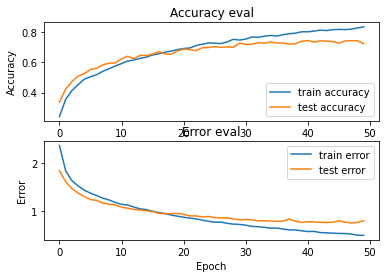

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 0s - loss: 0.8027 - accuracy: 0.7259

Test accuracy: 0.7258903384208679


In [ ]:
model_cnn.save("Music_Genre_10_CNN2D")

INFO:tensorflow:Assets written to: Music_Genre_10_CNN2D\assets


In [ ]:
model_cnn.save("Music_Genre_10_CNN2D.h5")

# RNN

In [ ]:
X, y = load_data(DATA_PATH)
y = y.reshape(-1,1)

Data succesfully loaded!


In [ ]:
X.shape

(9996, 130, 13)

In [ ]:
y.shape

(9996, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test =train_test_split(X , y  ,test_size=0.2 ,shuffle= True)
X_train, X_valid, y_train, y_valid =train_test_split(X_train_val , y_train_val  ,test_size=0.2)

In [ ]:
model = keras.models.Sequential([

    keras.layers.LSTM(128, return_sequences=True, input_shape=[None, 13]),
    keras.layers.LayerNormalization(),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.LSTM(32),
    keras.layers.Dense(10 ,  activation="softmax")
])

model.compile(loss ='sparse_categorical_crossentropy', optimizer = keras.optimizers.Adam() , metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train , y_train ,validation_data=(X_valid , y_valid) , epochs=50 , batch_size=32)

Epoch 1/50
200/200 [==============================] - 27s 120ms/step - loss: 1.8329 - accuracy: 0.3653 - val_loss: 1.4986 - val_accuracy: 0.4575
Epoch 2/50
200/200 [==============================] - 23s 114ms/step - loss: 1.3714 - accuracy: 0.5042 - val_loss: 1.3371 - val_accuracy: 0.5225
Epoch 3/50
200/200 [==============================] - 23s 113ms/step - loss: 1.2496 - accuracy: 0.5524 - val_loss: 1.2573 - val_accuracy: 0.5494
Epoch 4/50
200/200 [==============================] - 23s 113ms/step - loss: 1.1383 - accuracy: 0.6036 - val_loss: 1.1970 - val_accuracy: 0.5794
Epoch 5/50
200/200 [==============================] - 23s 113ms/step - loss: 1.0661 - accuracy: 0.6275 - val_loss: 1.3258 - val_accuracy: 0.5456
Epoch 6/50
200/200 [==============================] - 23s 114ms/step - loss: 1.1010 - accuracy: 0.6127 - val_loss: 1.1084 - val_accuracy: 0.6075
Epoch 7/50
200/200 [==============================] - 23s 113ms/step - loss: 0.9711 - accuracy: 0.6570 - val_loss: 1.0964 - val_ac

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

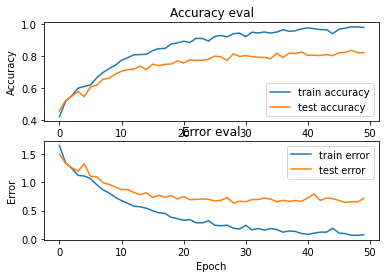

In [ ]:
plot_history(history)

In [ ]:
model.evaluate(X_test ,y_test)

63/63 [==============================] - 3s 37ms/step - loss: 0.8625 - accuracy: 0.8020


[0.862467885017395, 0.8019999861717224]

#Test